In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import movie_functions as mov
import operator
%matplotlib inline

In [42]:
# upload first two datasets: box office mojo for domestic gross values, the movie database for release dates

bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv')
tmdb_df = pd.read_csv('./zippedData/tmdb.movies.csv')

In [43]:
tmdb_df.rename(columns = {'title': 'Title'}, inplace = True)

In [44]:
tmdb_df.rename(columns = {'original_title': 'title'}, inplace = True)

In [45]:
# merge these two datasets on the title column, 
# inner merge so that we don't have movies that have null values for either the release date or domestic gross

bom_tmdb_df = pd.merge(bom_df, tmdb_df, on = 'title', how = 'inner')

In [46]:
#upload imdb title basics info for genre info, title ratings for rating info

imdb_title_basics_df = pd.read_csv('./zippedData/imdb.title.basics.csv')
imdb_title_ratings_df = pd.read_csv('./zippedData/imdb.title.ratings.csv')

In [47]:
# merge imdb datasets on the id given by imdb

imdb_df = pd.merge(imdb_title_basics_df, imdb_title_ratings_df, on = 'tconst', how = 'inner')

In [48]:
# rename primary title to just title so this data set can be 
# merged with the box office mojo/the movie database merged db above

imdb_df.rename(columns = {'original_title': 'title'}, inplace = True)

In [52]:
# merge bom/tmdb database and imdb database

merged_df = pd.merge(bom_tmdb_df, imdb_df, on = 'title', how = 'inner')

In [55]:
# drop duplicate entries based on thier id given in imdb database

merged_df.drop_duplicates(subset='tconst', inplace = True)

In [58]:
# drop duplicate entries based on thier id given in tmdb database

merged_df.drop_duplicates(subset='id', inplace = True)

In [60]:
# since we'll be measuring a movie's success by its domestic gross, we can't have data that does not have a domestic gross

merged_df.dropna(subset=['domestic_gross'], inplace = True)

In [66]:
# drop columns that won't be used in our analysis

merged_df.drop(columns=['foreign_gross', 'Unnamed: 0', 'genre_ids', 
                        'Title', 'primary_title', 'start_year', 
                        'year', 'id', 'original_language', 'tconst', 
                        'vote_average', 'vote_count', 'popularity'], inplace = True)

In [71]:
# turn the release date into a datetime object so the month, year, and day are easier to access

merged_df['release_date'] = merged_df['release_date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d'))

In [73]:
# add a column 'month', that lists just the month of release

merged_df['month'] = merged_df['release_date'].apply(lambda x: x.month)

In [76]:
# add a column 'day', classifies each movie as being released at the beginning, middle, or end of the month

merged_df['day']= merged_df['release_date'].apply(lambda x: 'beg' if x.day < 11 else('mid' if x.day < 21 else 'end'))

In [79]:
# split the genres string for each movie into separate list items

merged_df['genres'] = merged_df['genres'].apply(lambda x: x.split(','))

In [82]:
# create a list of lists from the genres dataseries

nested_list_genres = list(merged_df['genres'])

In [83]:
# flatten the nested_list into one long list

genre_list = [item for sublist in nested_list_genres for item in sublist]

In [92]:
# obtain a list of all the unique genres (uses unique function from movie_functions.py)

unique_genres = mov.unique(genre_list)

In [88]:
# add dummy variables for unique genres

merged_df['Adventure'] = mov.adventure(nested_list_genres)
merged_df['Drama'] = mov.drama(nested_list_genres)
merged_df['Romance'] = mov.romance(nested_list_genres)
merged_df['Action'] = mov.action(nested_list_genres)
merged_df['Crime'] = mov.crime(nested_list_genres)
merged_df['Sci-fi'] = mov.scifi(nested_list_genres)
merged_df['Comedy'] = mov.comedy(nested_list_genres)
merged_df['Family'] = mov.family(nested_list_genres)
merged_df['Animation'] = mov.animation(nested_list_genres)
merged_df['Thriller'] = mov.thriller(nested_list_genres)
merged_df['Mystery'] = mov.mystery(nested_list_genres)
merged_df['Horror'] = mov.horror(nested_list_genres)
merged_df['Biography'] = mov.biography(nested_list_genres)
merged_df['History'] = mov.history(nested_list_genres)
merged_df['Fantasy'] = mov.fantasy(nested_list_genres)
merged_df['Music'] = mov.music(nested_list_genres)
merged_df['War'] = mov.war(nested_list_genres)
merged_df['Sport'] = mov.sport(nested_list_genres)
merged_df['Western'] = mov.western(nested_list_genres)
merged_df['Documentary'] = mov.documentary(nested_list_genres)
merged_df['Musical'] = mov.musical(nested_list_genres)

In [96]:
# now that the dummy variables have been made, we can drop the genres column

merged_df.drop(columns=['genres'], inplace = True)

In [98]:
# create list of month labels for data visuals

tick_label_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

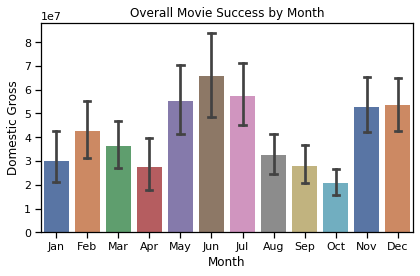

In [125]:
# this graph shows us that the domestic gross varies by month for movies overall

sns.set_context('notebook')

sns.barplot(x='month', y="domestic_gross", 
            data = merged_df, capsize=.2, 
            palette="deep").set(title = 'Overall Movie Success by Month', 
                                xticklabels = tick_label_list,
                               xlabel = 'Month',
                               ylabel = 'Domestic Gross')
plt.tight_layout()
plt.show()

In [234]:
# obtain top 6 genres with the most movies, obrain a list with those genres

sum_dict = dict(zip(merged_df.columns[-21:], merged_df.sum()['Adventure':]))

sorted_dict = sorted(sum_dict.items(), key=operator.itemgetter(1), reverse = True)

top_six = sorted_dict[:6]

top_six_genre_list = []
for item in top_six:
    top_six_genre_list.append(item[0])
    
top_six_genre_list

['Drama', 'Comedy', 'Action', 'Adventure', 'Romance', 'Thriller']

In [256]:
# create dataframe that only has movies that are in these six genres

six_genres_df = merged_df.loc[(merged_df['Drama'] == 1) | (merged_df['Comedy'] == 1) | 
                             (merged_df['Action'] == 1) | (merged_df['Adventure'] == 1) | 
                             merged_df['Thriller'] == 1 | (merged_df['Romance'] == 1)]

In [257]:
# create dataframe of the domestic grosses for the top six genres

data_genres = [pd.Series(drama_df['domestic_gross']), pd.Series(comedy_df['domestic_gross']), 
               pd.Series(action_df['domestic_gross']), pd.Series(adventure_df['domestic_gross']), 
               pd.Series(romance_df['domestic_gross']), pd.Series(thriller_df['domestic_gross'])]
data = dict(zip(top_six_genre_list, data_genres))
dom_gross_genre_df = pd.DataFrame(data)

# add column for dataframe to merge on

dom_gross_genre_df['title'] = six_genres_df['title']

# rename columns to prep for merge
dom_gross_genre_df.rename(columns = {'Drama':'drama_gross', 'Comedy':'comedy_gross', 
                                     'Action':'action_gross', 'Adventure': 'adventure_gross', 
                                     'Romance': 'romance_gross', 'Thriller': 'thriller_gross'}, inplace = True)

In [261]:
# merge dataframes

six_genres_df = pd.merge(six_genres_df, dom_gross_genre_df, on = 'title')

In [266]:
# melt dataframe so we can see divide data by genre

by_genre_df = pd.melt(six_genres_df, id_vars=['studio', 'month', 'day'], 
                      value_vars=['drama_gross', 'comedy_gross', 'action_gross', 
                                  'adventure_gross', 'romance_gross', 'thriller_gross'])
by_genre_df.head()

,studio,month,day,variable,value
0,BV,6,mid,drama_gross,NaN
1,WB,7,mid,drama_gross,NaN
2,P/DW,5,mid,drama_gross,NaN
3,Sum.,6,end,drama_gross,300500000.0
4,Par.,5,beg,drama_gross,NaN


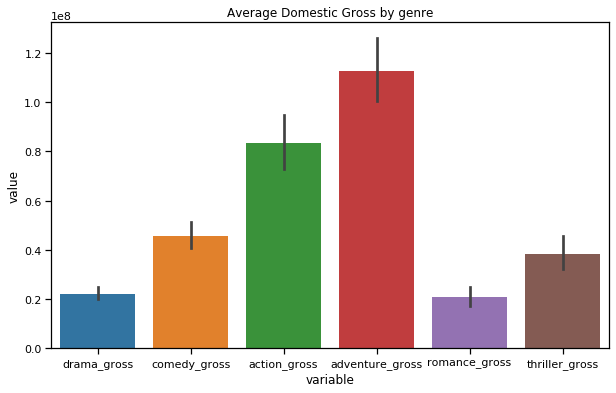

In [270]:
# see overall success by genre

f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'variable', y = 'value', data = by_genre_df).set(title = 'Average Domestic Gross by genre')

plt.show()

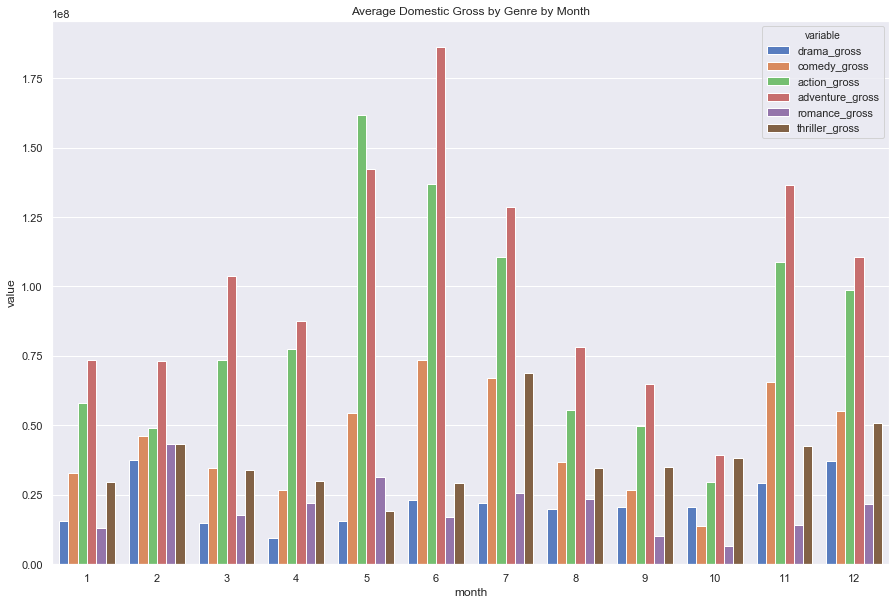

In [295]:
f, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x="month", y="value", hue="variable", data=by_genre_df,
                palette="muted", ci=None).set(title = 'Average Domestic Gross by Genre by Month')



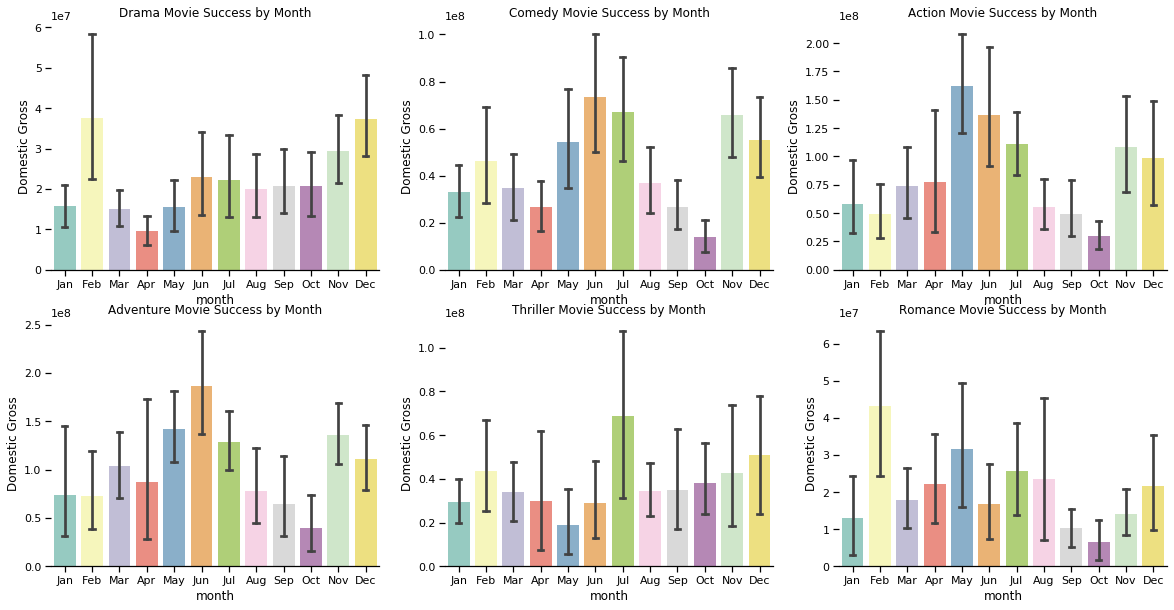

In [146]:
f, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.despine(left=True)

sns.barplot(x="month", y="domestic_gross", data=merged_df.loc[merged_df['Drama'] == 1], capsize=.2, palette="Set3", ax=axes[0, 0]).set(ylabel= "Domestic Gross", title = "Drama Movie Success by Month", xticklabels = tick_label_list)
sns.barplot(x="month", y="domestic_gross", data=merged_df.loc[merged_df['Comedy'] == 1], capsize=.2, palette="Set3", ax=axes[0, 1]).set(ylabel= "Domestic Gross", title = "Comedy Movie Success by Month", xticklabels = tick_label_list)
sns.barplot(x="month", y="domestic_gross", data=merged_df.loc[merged_df['Action'] == 1], capsize=.2, palette="Set3", ax=axes[0, 2]).set(ylabel= "Domestic Gross", title = "Action Movie Success by Month", xticklabels = tick_label_list)
sns.barplot(x="month", y="domestic_gross", data=merged_df.loc[merged_df['Adventure'] == 1], capsize=.2, palette="Set3", ax=axes[1, 0]).set(ylabel= "Domestic Gross", title = "Adventure Movie Success by Month", xticklabels = tick_label_list)
sns.barplot(x="month", y="domestic_gross", data=merged_df.loc[merged_df['Thriller'] == 1], capsize=.2, palette="Set3", ax=axes[1, 1]).set(ylabel= "Domestic Gross", title = "Thriller Movie Success by Month", xticklabels = tick_label_list)
sns.barplot(x="month", y="domestic_gross", data=merged_df.loc[merged_df['Romance'] == 1], capsize=.2, palette="Set3", ax=axes[1, 2]).set(ylabel= "Domestic Gross", title = "Romance Movie Success by Month", xticklabels = tick_label_list)
plt.setp(axes, xticklabels = tick_label_list)

plt.show()

['Drama', 'Comedy', 'Action', 'Adventure', 'Romance', 'Thriller']

In [154]:
# create separate dataframes for these different genres

drama_df = merged_df.loc[merged_df['Drama'] == 1]
comedy_df = merged_df.loc[merged_df['Comedy'] == 1]
action_df = merged_df.loc[merged_df['Action'] == 1]
adventure_df = merged_df.loc[merged_df['Adventure'] == 1]
romance_df = merged_df.loc[merged_df['Romance'] == 1]
thriller_df = merged_df.loc[merged_df['Thriller'] == 1]

In [232]:
dom_gross_genre_df.shape

(1710, 6)

In [233]:
merged_df.shape

(1854, 30)

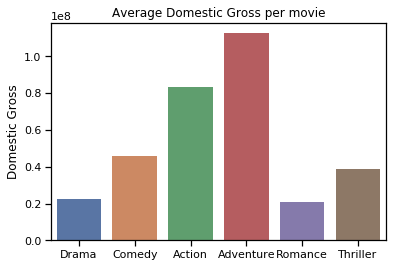

In [187]:
# create barplot of the mean domestic gross of each genre
sns.barplot(x= top_six_genre_list, 
            y= dom_gross_genre_df.mean(axis = 0, skipna = True), 
            palette = 'deep').set(ylabel = 'Domestic Gross',
                                  title = 'Average Domestic Gross per movie')

plt.show()


In [150]:
# obtain top five studios
merged_df['studio'].value_counts()[:5]

Uni.    124
Fox     117
WB      103
IFC      98
BV       81
Name: studio, dtype: int64

In [202]:
# divide each studio by genre

uni_drama_df = drama_df.loc[drama_df['studio']=='Uni.']
uni_comedy_df = comedy_df.loc[comedy_df['studio']=='Uni.']
uni_action_df = action_df.loc[action_df['studio']=='Uni.']
uni_adventure_df = adventure_df.loc[adventure_df['studio']=='Uni.']
uni_romance_df = romance_df.loc[romance_df['studio']=='Uni.']
uni_thriller_df = thriller_df.loc[thriller_df['studio']=='Uni.']

fox_drama_df = drama_df.loc[drama_df['studio']=='Fox']
fox_comedy_df = comedy_df.loc[comedy_df['studio']=='Fox']
fox_action_df = action_df.loc[action_df['studio']=='Fox']
fox_adventure_df = adventure_df.loc[adventure_df['studio']=='Fox']
fox_romance_df = romance_df.loc[romance_df['studio']=='Fox']
fox_thriller_df = thriller_df.loc[thriller_df['studio']=='Fox']

wb_drama_df = drama_df.loc[drama_df['studio']=='WB']
wb_comedy_df = comedy_df.loc[comedy_df['studio']=='WB']
wb_action_df = action_df.loc[action_df['studio']=='WB']
wb_adventure_df = adventure_df.loc[adventure_df['studio']=='WB']
wb_romance_df = romance_df.loc[romance_df['studio']=='WB']
wb_thriller_df = thriller_df.loc[thriller_df['studio']=='WB']

ifc_drama_df = drama_df.loc[drama_df['studio']=='IFC']
ifc_comedy_df = comedy_df.loc[comedy_df['studio']=='IFC']
ifc_action_df = action_df.loc[action_df['studio']=='IFC']
ifc_adventure_df = adventure_df.loc[adventure_df['studio']=='IFC']
ifc_romance_df = romance_df.loc[romance_df['studio']=='IFC']
ifc_thriller_df = thriller_df.loc[thriller_df['studio']=='IFC']

bv_drama_df = drama_df.loc[drama_df['studio']=='BV']
bv_comedy_df = comedy_df.loc[comedy_df['studio']=='BV']
bv_action_df = action_df.loc[action_df['studio']=='BV']
bv_adventure_df = adventure_df.loc[adventure_df['studio']=='BV']
bv_romance_df = romance_df.loc[romance_df['studio']=='BV']
bv_thriller_df = thriller_df.loc[thriller_df['studio']=='BV']

In [193]:
uni_drama_df.shape

(40, 30)

In [194]:
uni_comedy_df.shape

(59, 30)

In [195]:
uni_action_df.shape

(46, 30)

In [197]:
uni_adventure_df.shape

(32, 30)

In [198]:
uni_romance_df.shape

(21, 30)

In [199]:
uni_thriller_df.shape

(25, 30)

In [215]:
merged_df.loc[(merged_df['studio'] == 'Uni.') & (merged_df['Drama'] == 1)]

,title,studio,domestic_gross,release_date,runtime_minutes,averagerating,numvotes,month,day,Adventure,...,Horror,Biography,History,Fantasy,Music,War,Sport,Western,Documentary,Musical
14,Robin Hood,Uni.,105300000.0,2010-05-14,140.0,6.6,239480,5,mid,1,...,0,0,0,0,0,0,0,0.0,0.0,0.0
56,The Wolfman,Uni.,62000000.0,2010-02-12,103.0,5.8,97873,2,mid,0,...,1,0,0,1,0,0,0,0.0,0.0,1.0
71,Green Zone,Uni.,35100000.0,2010-03-11,115.0,6.8,122132,3,mid,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
106,Charlie St. Cloud,Uni.,31200000.0,2010-05-01,99.0,6.5,55016,5,beg,0,...,0,0,0,1,0,0,0,0.0,0.0,0.0
286,Sanctum,Uni.,23200000.0,2011-02-04,108.0,5.9,51318,2,beg,1,...,0,0,0,0,0,0,0,0.0,0.0,0.0
310,Larry Crowne,Uni.,35600000.0,2011-06-30,98.0,6.1,58927,6,end,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
311,The Dilemma,Uni.,48500000.0,2011-01-13,111.0,5.3,48148,1,mid,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
334,Dream House,Uni.,21300000.0,2011-09-30,84.0,6.0,59714,9,end,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
520,Snow White and the Huntsman,Uni.,155300000.0,2012-06-01,127.0,6.1,258938,6,beg,1,...,0,0,0,0,0,0,0,0.0,0.0,0.0
565,Contraband,Uni.,66500000.0,2012-01-13,109.0,6.5,111709,1,mid,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [222]:
top_five_studios_df = merged_df.loc[(merged_df['studio'] == 'Uni.') | (merged_df['studio'] == 'Fox') | 
                                 (merged_df['studio'] == 'WB') | (merged_df['studio'] == 'IFC') | 
                                 (merged_df['studio'] == 'BV')]

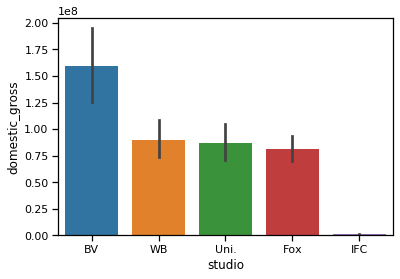

In [223]:
sns.barplot(x = 'studio', y = 'domestic_gross', data = top_five_studios_df)

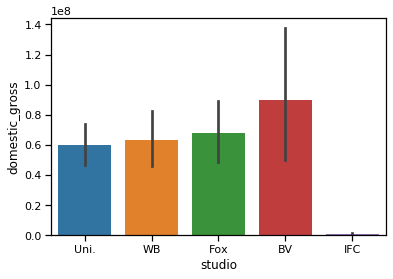

In [225]:
sns.barplot(x = 'studio', y = 'domestic_gross', data = top_five_studios_df.loc[top_five_studios_df['Drama'] == 1])

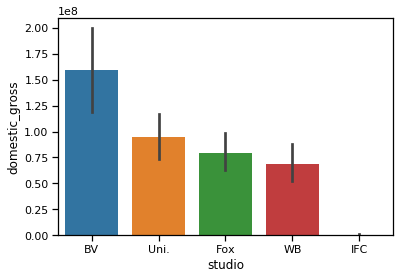

In [226]:
sns.barplot(x = 'studio', y = 'domestic_gross', data = top_five_studios_df.loc[top_five_studios_df['Comedy'] == 1])

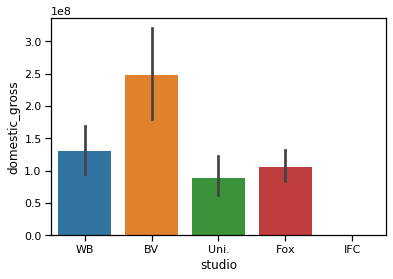

In [227]:
sns.barplot(x = 'studio', y = 'domestic_gross', data = top_five_studios_df.loc[top_five_studios_df['Action'] == 1])

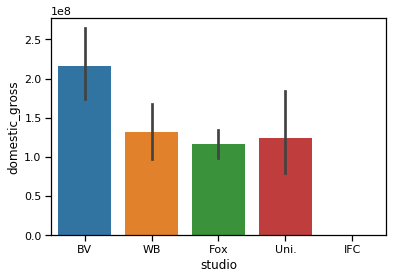

In [228]:
sns.barplot(x = 'studio', y = 'domestic_gross', data = top_five_studios_df.loc[top_five_studios_df['Adventure'] == 1])

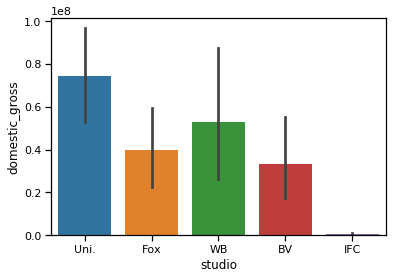

In [229]:
sns.barplot(x = 'studio', y = 'domestic_gross', data = top_five_studios_df.loc[top_five_studios_df['Romance'] == 1])

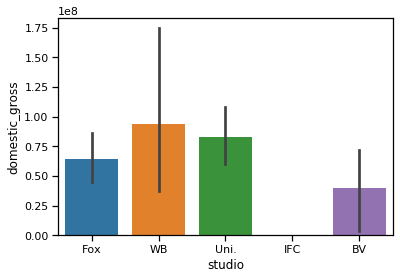

In [230]:
sns.barplot(x = 'studio', y = 'domestic_gross', data = top_five_studios_df.loc[top_five_studios_df['Thriller'] == 1])